# Patrones de DRX de fosfatos de cálcio: Hidroxiapatita.



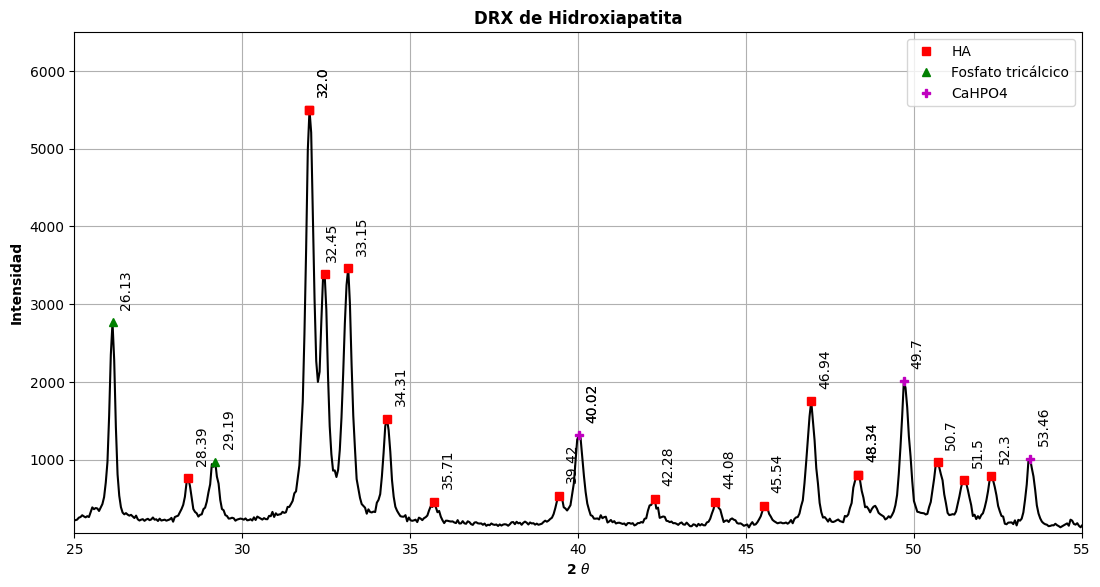

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando los datos para el DRX
data = pd.read_excel("DATOS_DRX_HA.xlsx")

# Realizar la gráfica
fig, ax = plt.subplots(figsize=(13,6.5))
plt.title("DRX de Hidroxiapatita", weight="bold")
plt.grid()
plt.plot(data["Angulo 2 Theta"], data["Intensidad "], color="black")
ax.set_xlabel(r"2 $\theta$", weight="bold")
ax.set_ylabel("Intensidad", weight="bold")

patron_ha = [25.9, 28.0, 28.88, 31.7, 32.2, 32.9, 34.0, 35.44, 39.23, 39.7,
             40.52, 42.0, 43.8, 45.34, 46.7, 48.0, 48.63, 49.4, 50.53, 51.54,
             52.0, 53.2]

otros = [26.134632227, 29.192794277, 40.021695961, 49.697520151, 53.457555458]

def graph_patrons(patron):
  for angle in patron:
    # Encuentra el pico más parecido al reportado
    filtered_data = data[(data["Angulo 2 Theta"] >= angle - 0.5) &
    (data["Angulo 2 Theta"] <= angle + 0.5)]
    peak_index = filtered_data["Intensidad "].idxmax()

    # Determina y grafica los puntos de esos picos
    peak_angle = data.loc[peak_index, "Angulo 2 Theta"]
    peak_intensity = data.loc[peak_index, "Intensidad "]

    if peak_angle not in otros:
      plt.plot(peak_angle, peak_intensity, "rs")

    ax.text(peak_angle + 0.2, peak_intensity + 200, str(round(peak_angle, 2)),
            rotation = "vertical")

graph_patrons(patron_ha)
# Detalles
plt.plot(32.4514, 3386, "rs", label = "HA")
ax.text(32.4514, 3586, "32.45", rotation = "vertical")

# Patron Fosfato tricálcico
plt.plot(26.134632227, data.loc[data["Angulo 2 Theta"] == 26.134632227, "Intensidad "].item(),
         "^g", label = "Fosfato tricálcico")
plt.plot(29.192794277, data.loc[data["Angulo 2 Theta"] == 29.192794277, "Intensidad "].item(),
         "^g")

# Patron CaHPO4
plt.plot(40.021695961, data.loc[data["Angulo 2 Theta"] == 40.021695961, "Intensidad "].item(),
         "Pm", label = "CaHPO4")
plt.plot(49.697520151, data.loc[data["Angulo 2 Theta"] == 49.697520151, "Intensidad "].item(),
         "Pm")
plt.plot(53.457555458, data.loc[data["Angulo 2 Theta"] == 53.457555458, "Intensidad "].item(),
         "Pm")

# Establecer limites y tamaño de la gráfica
ax.set_ylim(data["Intensidad "].min() - 50, data["Intensidad "].max() + 1000)
ax.set_xlim(25, 55)
plt.legend()

plt.show()